# **Курс "Програмування на мові Python"**

## **Практичні зайняття №11-12**

### Тема: "Рекурсивні функції. Рекурсивні структури даних"

### **Завдання 1 (1 бал)**

Реалізуйте функцію `cons(head, tail)`, що конструює новий список із довільного елемента `head` й іншого списку `tail`.

Сама по собі функція `cons` не є рекурсивною, однак вона породжує рекурсивну структуру даних, представлену нижче. 

In [59]:
def cons(head, tail = []):
    return [head] + tail

# ПЕРЕВІРКА

l = cons(3, 
        cons(2, 
            cons(1, [])))
print(f'Result: {l}')

assert l == [3, 2, 1], 'Failed test 1'
assert cons(1) == [1], 'Failed test 2'
print('All tests good!')

Result: [3, 2, 1]
All tests good!


Таким чином, легко уявити, що деякі традиційні структури даних цілком природньо обходяться за допомогою рекурсії.

Напишіть тепер рекурсивну функцію `sum(lst)`, яка сумуватиме список `lst`.

In [60]:
def sum(lst):
    if len(lst) == 0:
        return 0
    return lst[0] + sum(lst[1:])

# ПЕРЕВІРКА

print(sum(l))
assert sum(l) == 6, 'Failed on sum'
print('All tests good!')

6
All tests good!


### **Завдання 2 (1 бал)**

Реалізуйте рекурсивну функцію `rrange(begin, end, step)`, що повертає список елементів починаючи з `begin` і закінчуючи `end` невключно, із кроком `step`. Зверніть увагу, що крок може бути від'ємним. Якщо `begin` більше `end` при додатньому кроці (чи менше при від'ємному), або якщо крок нульовий, поверніть порожній список.

Зверніть увагу на тести, приведені нижче.

In [61]:
def rrange(begin, end, step = 1):
    if step == 0:
        return []
    elif (step > 0) and (begin >= end):
        return []
    elif (step < 0) and (begin <= end):
        return []
    else:
        return [begin] + rrange(begin + step, end, step)
    
# ПЕРЕВІРКА

x = rrange(1, 10)
y = rrange(10, 1, -1)
z = rrange(10, 1, 1)
#print(x, y, z)

assert x == list(range(1, 10)), 'Failed test for simple range'
assert y == list(range(10, 1, -1)), 'Failed test for reverse range'
assert z == list(range(10, 1, 1)), 'Failed test for empty range'
print('All tests good!')

All tests good!


### **Завдання 3 (1 бал)**

Реалізуйте [функцію Акермана](https://uk.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D1%96%D1%8F_%D0%90%D0%BA%D0%B5%D1%80%D0%BC%D0%B0%D0%BD%D0%B0), що має такий вигляд:
$$ 
A(m,n) = \begin{cases} 
n + 1, & \quad m = 0; \\
A(m-1, 1), & \quad m>0, n=0; \\
A(m-1, A(m, n-1)), & \quad m > 0, n > 0.
\end{cases}
$$

_Зауваження 1_: Функція Акермана, незважаючи на оманливу простоту свого визначення, має велику обчислювальну складність. На власний страх і ризик, можете спробувати обчислити значення $A(4, 3)$. Не пробуйте робити це у цьому середовищі (і на повільних домашніх компьютерах).

In [62]:
def Akk(m, n):
    if (m < 0) or (n < 0):
        return '-__-'
    
    if m == 0:
        return n + 1
    
    if m > 0:
        if n == 0:
            return Akk(m-1, 1)
        else:
            return Akk(m-1, Akk(m, n-1))

# ПЕРЕВІРКА

test_pairs = list((m, n) for m in range(0,4) for n in range(0,5))
results = [
    1,  2,  3,  4, 5, 
    2,  3,  4,  5, 6, 
    3,  5,  7,  9, 11,
    5, 13, 29, 61, 125
]
for (m, n), res in zip(test_pairs, results):
    assert Akk(m, n) == res, f'Failed test for (m, n) pair ({m}, {n}): Akk({m}, {n}) = {res}'
print('All tests good!')

All tests good!


### **Завдання 4 (3 бали)**

Нехай задано структуру даних, що представляє файли на диску, наступного вигляду:
- файли представлені у вигляді рядків зі своїм іменем;
- папки представлені у вигляді пари `(name, subnodes)`, де `name` — це ім'я папки, а `subnodes` — список з файлів і/або папок, що містяться у ній.

Приклад такої структури наведено нижче у змінній `dirs`.

Реалізуйте рекурсивну функцію `search(dirs, filename)` для пошуку усіх файлів із іменем `filename` у структурі `dirs`. Ця функція має повертати список, що містить повні шляхи до файлу у заданій структурі. Наприклад, `search(dirs, 'file2')` для наведеної нижче структури має повертати список `['/folder1/folder2/file2']`.

_Зауваження 1_: Ви можете, за необхідності, додати до сигнатури функції додаткові параметри, за умови, що вони матимуть значення за замовчуванням. Однак, я стверджую, що таку функцію завжди можна реалізувати використовуючи лише задану кількість параметрів, незалежно від того, чи будете ви використовувати рекурсію з акумулятором чи без.

_Зауваження 2_: Згадайте, що рекурсія буває не тільки безпосередньою, але й непрямою, коли послідовність функцій викликає одна одну: `f() -> g() -> ... -> f()`

_Зауваження 3_: Пам'ятайте, що Ви завжди можете використовувати функції `map` та `reduce`. Крім того, ви можете захотіти використати інші функції з модулів `functools` та `itertools`, наприклад `itertools.chain()`. Завдання, однак, можна виконати і без них (хоч це і не дуже зручно).

_Зауваження 4_: На мій смак, версія з акумулятором є більш елегантною, але дещо складнішою в реалізації. Спробуйте реалізувати обидві версії.

![](https://media.giphy.com/media/enCWEo0vG25Ow/giphy.gif) 

## INDIRECT RECURSION:

In [63]:
import itertools

dirs = [
    ( 'folder1',
        [
            'file1',
            ( 'folder2', 
                [
                    'file2',
                    'file3'
                ] 
            ),
            ( 'folder3', 
                [
                    'file3', 
                    'file4',
                    ('folder4', ['file3'])
                ] 
            ),
            'file5'
        ]
    )
]

def my_func(ele, filename):
    if type(ele) == str:
        # ele - file
        if ele == filename:
            return [filename]
        else:
            return []
    else:
        # ele - folder
        folder_name = ele[0]
        folders_dirs = ele[1]
        filepaths = search(folders_dirs, filename)
        filepaths = map(lambda x : '/' + folder_name + '/' + x, filepaths)
        return filepaths
    
def search(dirs, filename):
    #result = []
    #for ele in dirs:
    #    result.extend(my_func(ele, filename))
    #
    #return result
    
    # upper lines we can combine in one line:
    return list(itertools.chain(*[my_func(ele, filename) for ele in dirs]))
            
# ПЕРЕВІРКА

print(search(dirs, 'file1'))
print(search(dirs, 'file2'))
print(search(dirs, 'file3'))
print(search(dirs, 'file4'))
print(search(dirs, 'file5'))
print(search(dirs, 'file6'))
print(search(dirs, 'folder1'))

assert search(dirs, 'file1') == ['/folder1/file1'], 'Failed test for file1'
assert search(dirs, 'file2') == ['/folder1//folder2/file2'], 'Failed test for file2'
assert search(dirs, 'file3') == ['/folder1//folder2/file3', '/folder1//folder3/file3', '/folder1//folder3//folder4/file3'], 'Failed test for file3'
assert search(dirs, 'file4') == ['/folder1//folder3/file4'], 'Failed test for file4'
assert search(dirs, 'file5') == ['/folder1/file5'], 'Failed test for file5'
assert search(dirs, 'file6') == [], 'Failed test for file6'
assert search(dirs, 'folder1') == [], 'Failed test for folder1'
print('All tests good!')

['/folder1/file1']
['/folder1//folder2/file2']
['/folder1//folder2/file3', '/folder1//folder3/file3', '/folder1//folder3//folder4/file3']
['/folder1//folder3/file4']
['/folder1/file5']
[]
[]
All tests good!


## RECURSION:

In [64]:
dirs = [
    ( 'folder1',
        [
            'file1',
            ( 'folder2', 
                [
                    'file2',
                    'file3'
                ] 
            ),
            ( 'folder3', 
                [
                    'file3', 
                    'file4',
                    ('folder4', ['file3'])
                ] 
            ),
            'file5'
        ]
    )
]


def search(dirs, filename):
    if type(dirs) == str:
        # dirs - file
        if dirs == filename:
            return [filename]
        else:
            return []
    
    if type(dirs) == tuple:
        # dirs - folder
        folder_name = dirs[0]
        folders_dirs = dirs[1]
        filepaths = search(folders_dirs, filename)
        return list(map(lambda x: '/' + folder_name + '/' + x, filepaths))
    
    if len(dirs) == 0:
        return []
    
    return search(dirs[0], filename) + search(dirs[1:], filename)
            
# ПЕРЕВІРКА

print(search(dirs, 'file1'))
print(search(dirs, 'file2'))
print(search(dirs, 'file3'))
print(search(dirs, 'file4'))
print(search(dirs, 'file5'))
print(search(dirs, 'file6'))
print(search(dirs, 'folder1'))

assert search(dirs, 'file1') == ['/folder1/file1'], 'Failed test for file1'
assert search(dirs, 'file2') == ['/folder1//folder2/file2'], 'Failed test for file2'
assert search(dirs, 'file3') == ['/folder1//folder2/file3', '/folder1//folder3/file3', '/folder1//folder3//folder4/file3'], 'Failed test for file3'
assert search(dirs, 'file4') == ['/folder1//folder3/file4'], 'Failed test for file4'
assert search(dirs, 'file5') == ['/folder1/file5'], 'Failed test for file5'
assert search(dirs, 'file6') == [], 'Failed test for file6'
assert search(dirs, 'folder1') == [], 'Failed test for folder1'
print('All tests good!')

['/folder1/file1']
['/folder1//folder2/file2']
['/folder1//folder2/file3', '/folder1//folder3/file3', '/folder1//folder3//folder4/file3']
['/folder1//folder3/file4']
['/folder1/file5']
[]
[]
All tests good!


## RECURSION WITH ACCUMULATOR:

In [68]:
dirs = [
    ( 'folder1',
        [
            'file1',
            ( 'folder2', 
                [
                    'file2',
                    'file3'
                ] 
            ),
            ( 'folder3', 
                [
                    'file3', 
                    'file4',
                    ('folder4', ['file3'])
                ] 
            ),
            'file5'
        ]
    )
]


def search(dirs, filename, accumulator = [], cur_path = ""):
    # cur_path - the current path from original dirs to current dirs

    if type(dirs) == str:
        # dirs - file
        if dirs == filename:
            return accumulator + [cur_path + filename]
        else:
            return accumulator
    
    if type(dirs) == tuple:
        # dirs - folder
        folder_name = dirs[0]
        folders_dirs = dirs[1]

        return search(folders_dirs, filename, accumulator, cur_path + '/' + folder_name + '/')
    
    if len(dirs) == 0:
        return accumulator
    
    return (search(dirs[0], filename, accumulator, cur_path) + 
            search(dirs[1:], filename, [], cur_path)
    )
            
# ПЕРЕВІРКА


print(search(dirs, 'file1'))
print(search(dirs, 'file2'))
print(search(dirs, 'file3'))
print(search(dirs, 'file4'))
print(search(dirs, 'file5'))
print(search(dirs, 'file6'))
print(search(dirs, 'folder1'))

assert search(dirs, 'file1') == ['/folder1/file1'], 'Failed test for file1'
assert search(dirs, 'file2') == ['/folder1//folder2/file2'], 'Failed test for file2'
assert search(dirs, 'file3') == ['/folder1//folder2/file3', '/folder1//folder3/file3', '/folder1//folder3//folder4/file3'], 'Failed test for file3'
assert search(dirs, 'file4') == ['/folder1//folder3/file4'], 'Failed test for file4'
assert search(dirs, 'file5') == ['/folder1/file5'], 'Failed test for file5'
assert search(dirs, 'file6') == [], 'Failed test for file6'
assert search(dirs, 'folder1') == [], 'Failed test for folder1'
print('All tests good!')

['/folder1/file1']
['/folder1//folder2/file2']
['/folder1//folder2/file3', '/folder1//folder3/file3', '/folder1//folder3//folder4/file3']
['/folder1//folder3/file4']
['/folder1/file5']
[]
[]
All tests good!


Idk if this meant *'using accumulator'*, however it looks **Elegantly** for me
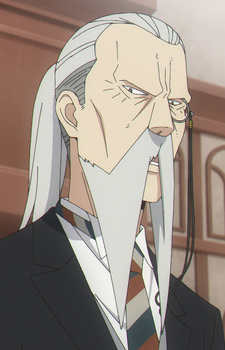